In [13]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import idaes

import fim_doe as doe

In [2]:
import cvxpy as cp

import openpyxl

import os

(CVXPY) Sep 05 08:18:24 PM: Encountered unexpected exception importing solver GUROBI:
ImportError('libgurobi95.so: cannot open shared object file: No such file or directory')
(CVXPY) Sep 05 08:18:24 PM: Encountered unexpected exception importing solver GUROBI:
ImportError('libgurobi95.so: cannot open shared object file: No such file or directory')


## data


In [3]:
file = '/home/parallels/Desktop/Parallels Shared Folders/Home/Desktop/CCSI2/RPB_sensitivity_8_25_22.xlsx'

data = pd.ExcelFile(file)

In [4]:
df1 = pd.read_excel(data, 'MTC')
df2 = pd.read_excel(data, 'HTC')
df3 = pd.read_excel(data, 'DH')
df4 = pd.read_excel(data, 'Iso_1')
df5 = pd.read_excel(data, 'Iso_2')

In [5]:
timeSet = list(df1['Time'][1:].tolist())
print(timeSet[0], timeSet[-1])
print(len(timeSet))

0 220
2201


In [6]:
col_names_up = df1.columns.values[2:18].tolist()
col_names_lo = df1.columns.values[20:].tolist()
print(col_names_up)
print(col_names_lo)

['ads_in_solid_T', 'Ads.gas_inlet.z("CO2")', 'Ads.gas_inlet.F', 'Ads.gas_outlet.F', 'Ads.gas_outlet.T', 'Ads.gas_outlet.z("CO2")', 'Des.gas_inlet.F', 'Des.gas_outlet.F', 'Des.gas_outlet.T', 'Des.gas_outlet.z("CO2")', 'Ads.T_g.Value(19,10)', 'Ads.T_g.Value(23,10)', 'Ads.T_g.Value(28,10)', 'Ads.z("CO2",19,10)', 'Ads.z("CO2",23,10)', 'Ads.z("CO2",28,10)']
['ads_in_solid_T.1', 'Ads.gas_inlet.z("CO2").1', 'Ads.gas_inlet.F.1', 'Ads.gas_outlet.F.1', 'Ads.gas_outlet.T.1', 'Ads.gas_outlet.z("CO2").1', 'Des.gas_inlet.F.1', 'Des.gas_outlet.F.1', 'Des.gas_outlet.T.1', 'Des.gas_outlet.z("CO2").1', 'Ads.T_g.Value(19,10).1', 'Ads.T_g.Value(23,10).1', 'Ads.T_g.Value(28,10).1', 'Ads.z("CO2",19,10).1', 'Ads.z("CO2",23,10).1', 'Ads.z("CO2",28,10).1']


In [18]:
# 10 scenarios in total. We are going to map them from 0 to 9 with
# MTC_up, MTC_lo, HTC_up, HTC_lo, DH_up, DH_lo, LSO1_up, LSO1_do, LSO1_up, LSO1_do

output_record = {}
output_doe = {}

for s in [0,2,4,6,8]:
    
    df = [df1, df2, df3, df4, df5][int(s/2)]
    
    output_up = []
    output_all_up = []
    
    for nam in col_names_up:
        output_up.append(df[nam].values[1:].tolist())
        
        for idx in list(df[nam].values[1:].tolist()):
            output_all_up.append(idx)
        
    output_lo = []
    output_all_lo = []
    
    for nam in col_names_lo:
        output_lo.append(df[nam].values[1:].tolist())
        
        for idx in list(df[nam].values[1:].tolist()):
            output_all_lo.append(idx)
        
        
    output_record[s] = output_up
    output_record[s+1] = output_lo
    output_doe[s] = output_all_up
    output_doe[s+1] = output_all_lo

In [19]:
output = pd.DataFrame(output_record)

output.to_csv('RotaryBed.csv')

In [20]:
print(output.head)

<bound method NDFrame.head of                                                     0  \
0   [90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90....   
1   [0.0391, 0.0391, 0.0391, 0.0391, 0.0391, 0.039...   
2   [365.275, 365.275, 365.275, 365.275, 365.275, ...   
3   [354.355, 354.355, 354.355, 354.355, 354.355, ...   
4   [102.563, 102.77, 102.77, 102.77, 102.77, 102....   
5   [0.00948926, 0.00948926, 0.00948926, 0.0094892...   
6   [251.864, 251.864, 251.864, 251.865, 251.865, ...   
7   [263.058, 263.058, 263.058, 263.058, 263.058, ...   
8   [129.524, 129.699, 129.699, 129.699, 129.699, ...   
9   [0.0425519, 0.0425519, 0.0425519, 0.0425519, 0...   
10  [104.783, 104.783, 104.783, 104.783, 104.783, ...   
11  [111.644, 111.644, 111.644, 111.644, 111.644, ...   
12  [112.532, 112.532, 112.532, 112.532, 112.532, ...   
13  [0.0295083, 0.0295083, 0.0295083, 0.0295083, 0...   
14  [0.0233586, 0.0233586, 0.0233585, 0.0233585, 0...   
15  [0.0152305, 0.0152305, 0.0152305, 0.0152305, 0...   



In [21]:
print(len(output_doe[0]))

35216


In [39]:
print(df1.iloc[0])
col_names_unit = ['ads_in_solid_T (/)', 
                  'Ads.gas_inlet.z("CO2") (kmol/kmol)', 
                  'Ads.gas_inlet.F (kmol/hr)', 
                  'Ads.gas_outlet.F (kmol/hr)', 
                  'Ads.gas_outlet.T (C)', 
                  'Ads.gas_outlet.z("CO2") (kmol/kmol)', 
                  'Des.gas_inlet.F (kmol/hr)', 
                  'Des.gas_outlet.F (kmol/hr)', 
                  'Des.gas_outlet.T (C)', 
                  'Des.gas_outlet.z("CO2") (kmol/kmol)', 
                  'Ads.T_g.Value(19,10) (C)', 
                  'Ads.T_g.Value(23,10) (C)', 
                  'Ads.T_g.Value(28,10) (C)', 
                  'Ads.z("CO2",19,10) (kmol/kmol)', 
                  'Ads.z("CO2",23,10) (kmol/kmol)', 
                  'Ads.z("CO2",28,10) (kmol/kmol)']

Time                           Minutes
Ads.R_MTC                          NaN
ads_in_solid_T                     NaN
Ads.gas_inlet.z("CO2")       kmol/kmol
Ads.gas_inlet.F                kmol/hr
Ads.gas_outlet.F               kmol/hr
Ads.gas_outlet.T                     C
Ads.gas_outlet.z("CO2")      kmol/kmol
Des.gas_inlet.F                kmol/hr
Des.gas_outlet.F               kmol/hr
Des.gas_outlet.T                     C
Des.gas_outlet.z("CO2")      kmol/kmol
Ads.T_g.Value(19,10)                 C
Ads.T_g.Value(23,10)                 C
Ads.T_g.Value(28,10)                 C
Ads.z("CO2",19,10)           kmol/kmol
Ads.z("CO2",23,10)           kmol/kmol
Ads.z("CO2",28,10)           kmol/kmol
Time.1                         Minutes
Ads.R_MTC.1                        NaN
ads_in_solid_T.1                   NaN
Ads.gas_inlet.z("CO2").1     kmol/kmol
Ads.gas_inlet.F.1              kmol/hr
Ads.gas_outlet.F.1             kmol/hr
Ads.gas_outlet.T.1                   C
Ads.gas_outlet.z("CO2").1

### draw figures

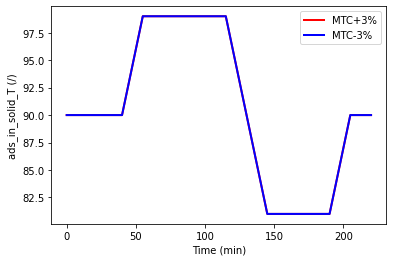

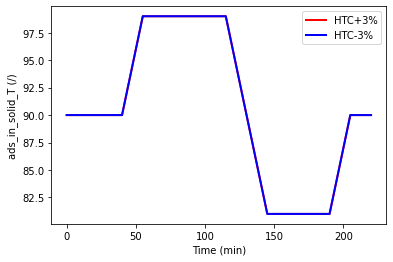

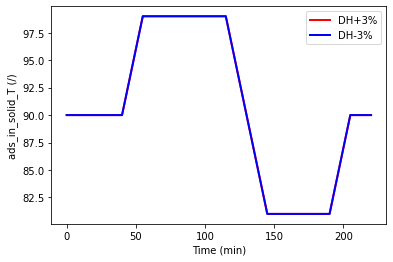

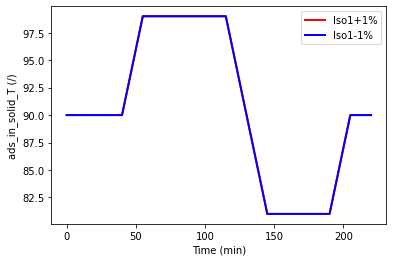

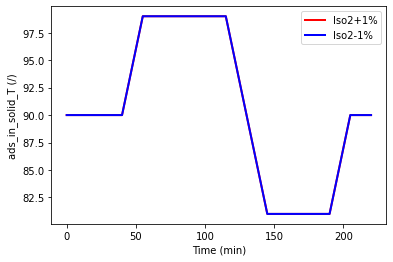

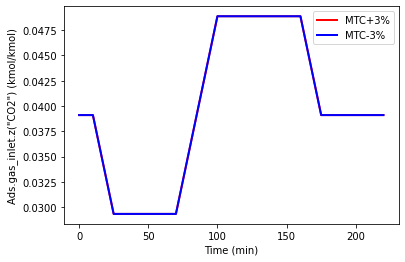

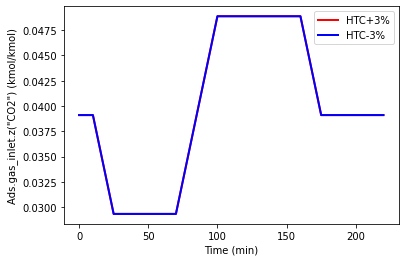

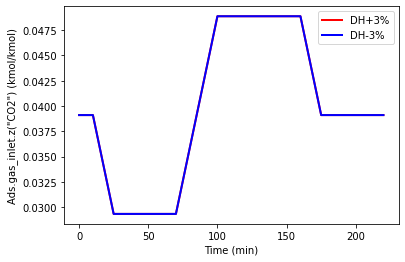

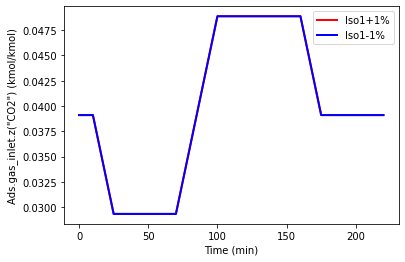

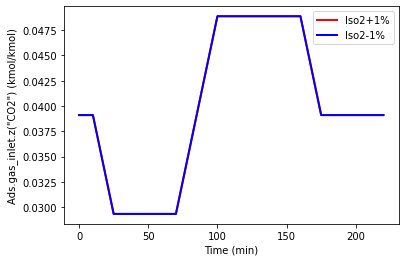

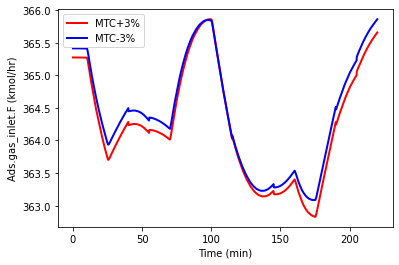

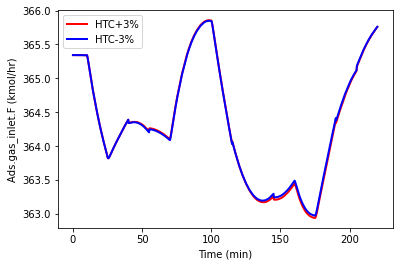

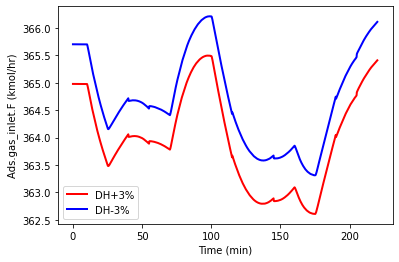

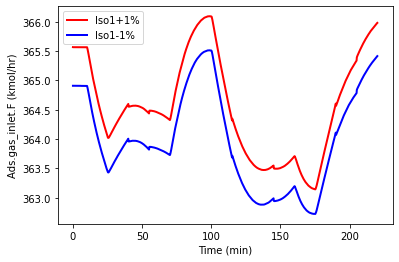

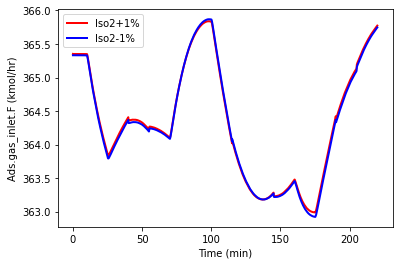

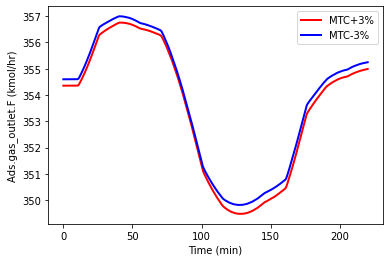

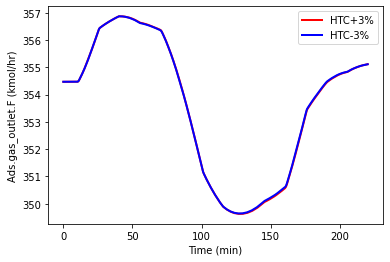

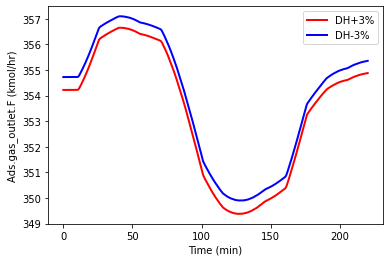

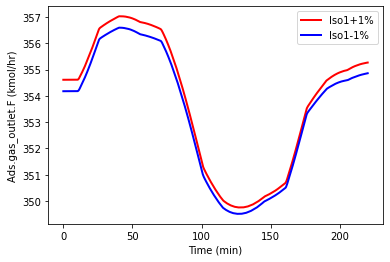

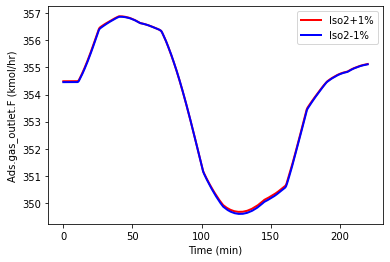

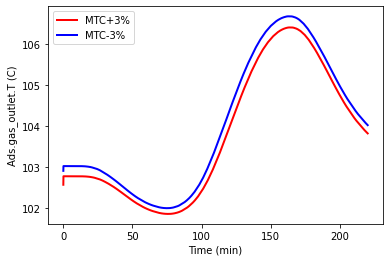

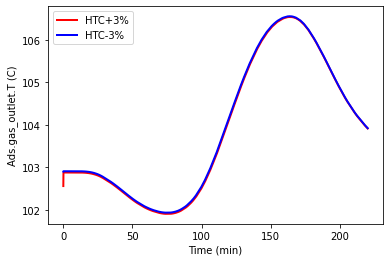

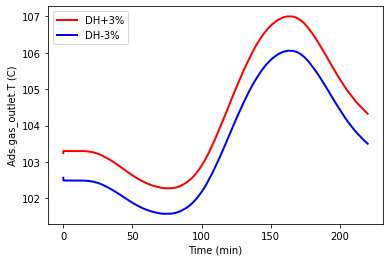

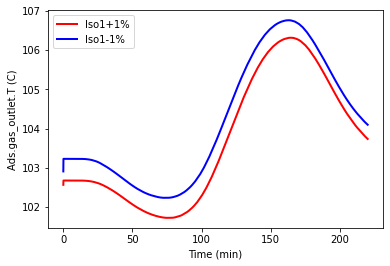

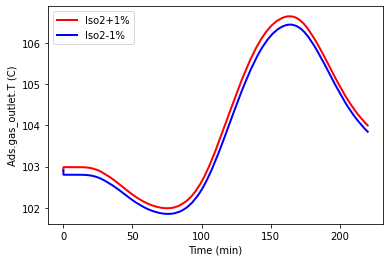

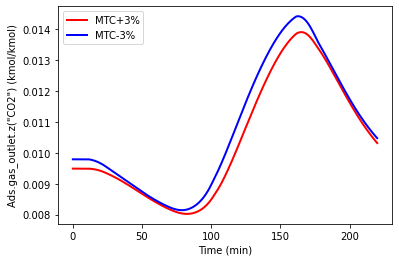

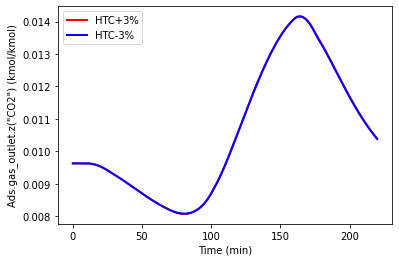

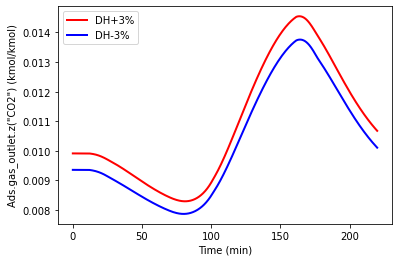

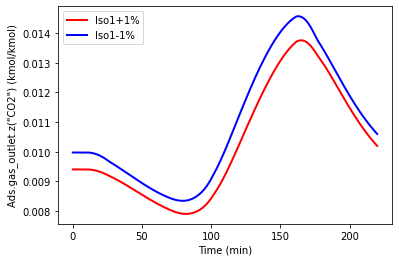

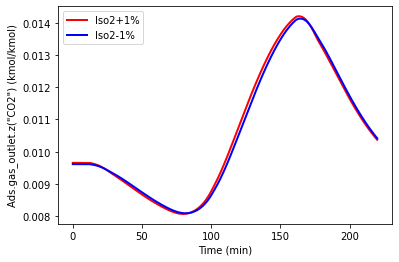

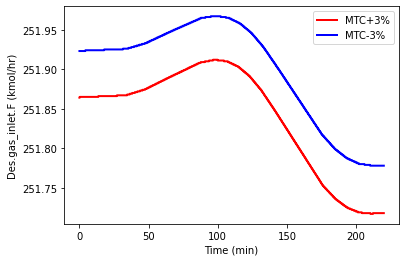

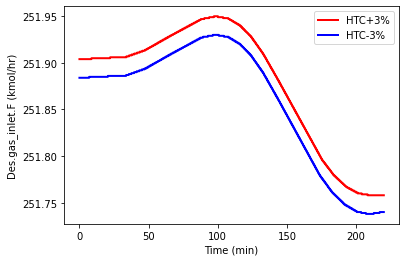

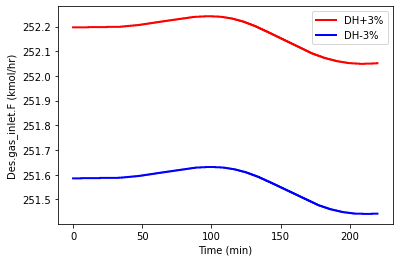

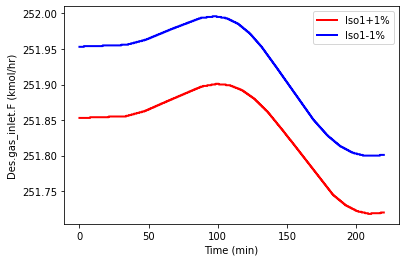

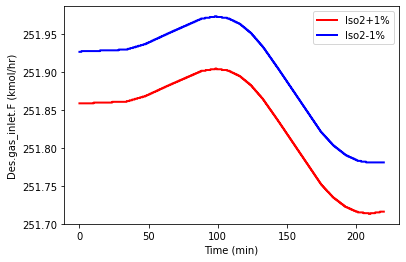

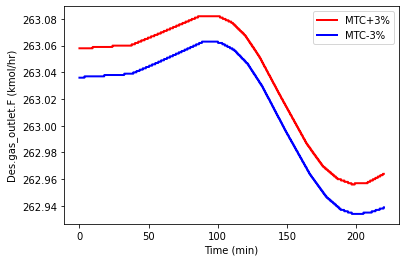

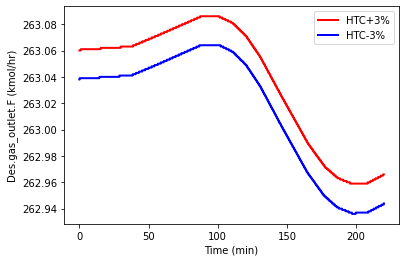

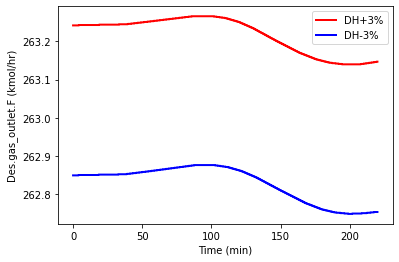

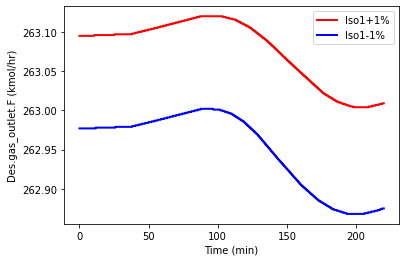

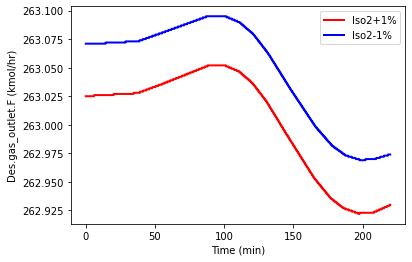

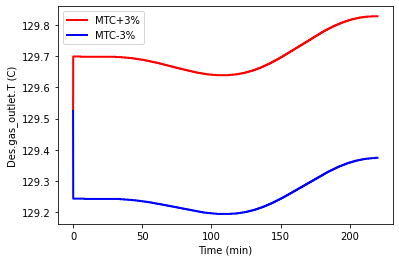

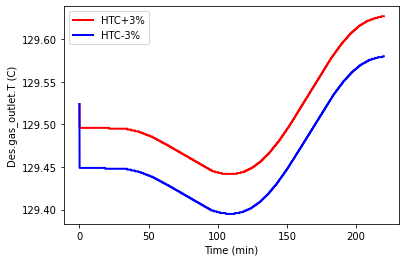

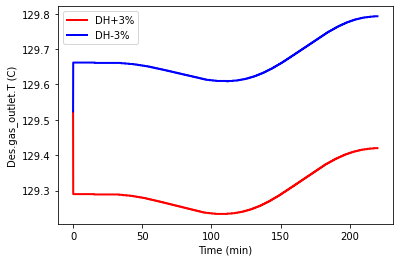

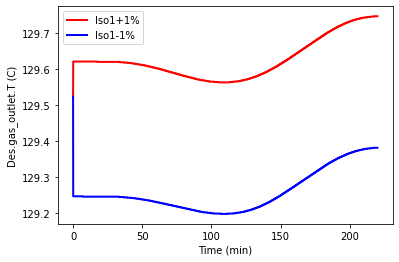

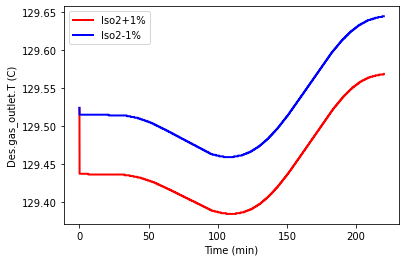

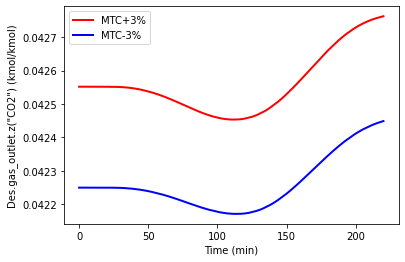

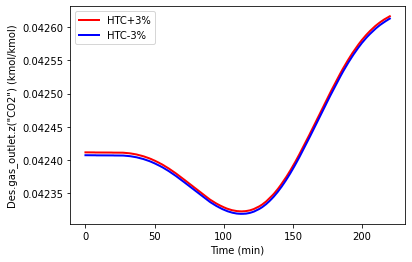

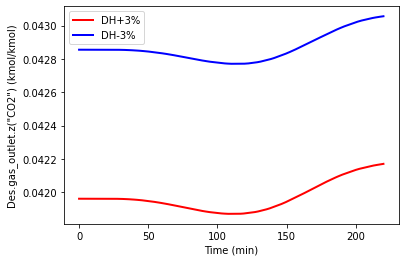

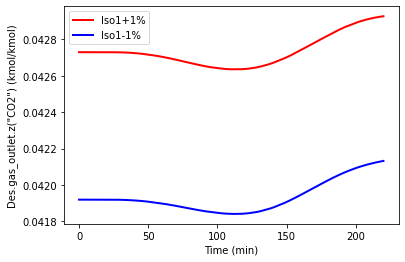

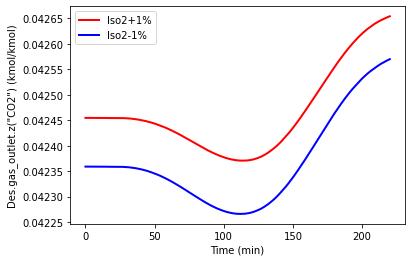

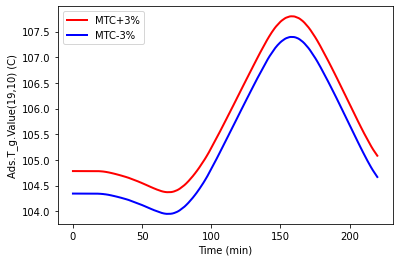

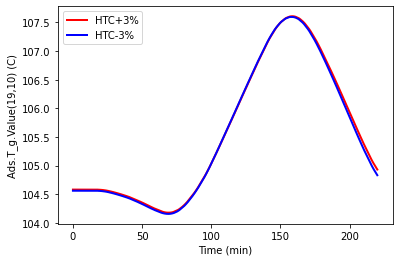

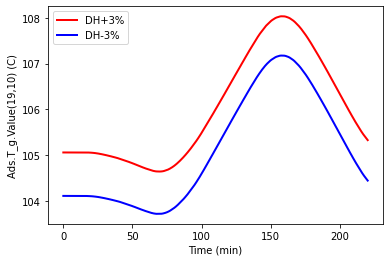

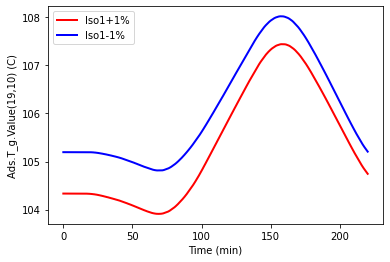

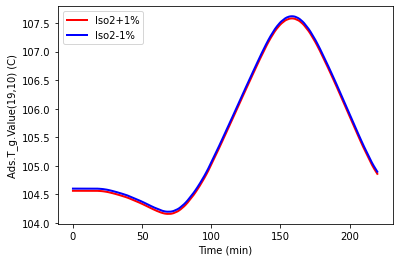

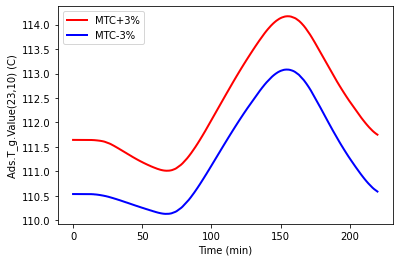

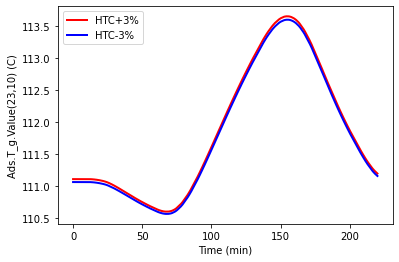

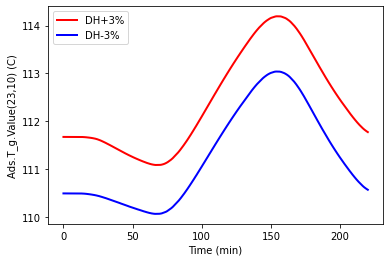

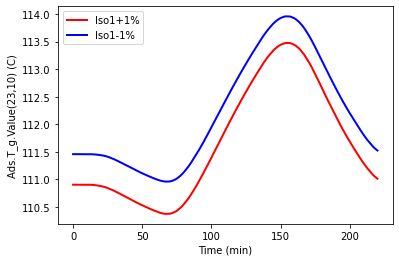

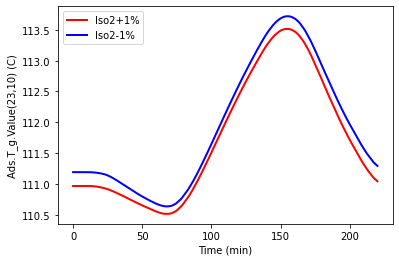

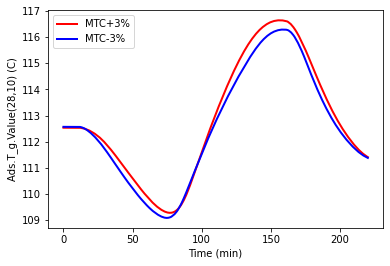

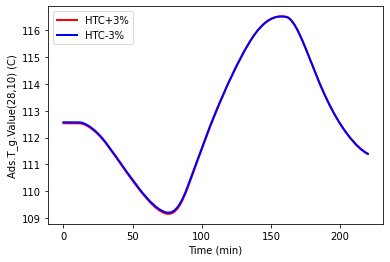

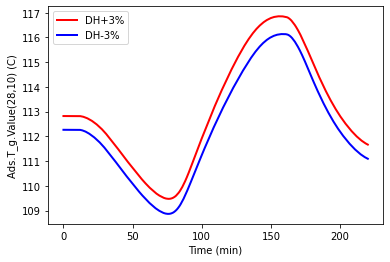

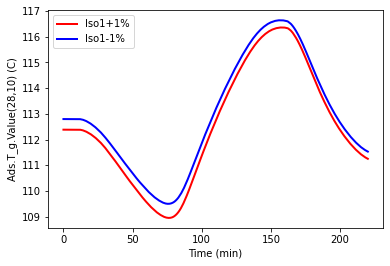

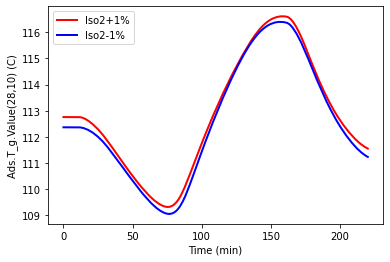

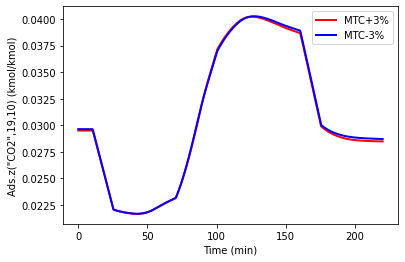

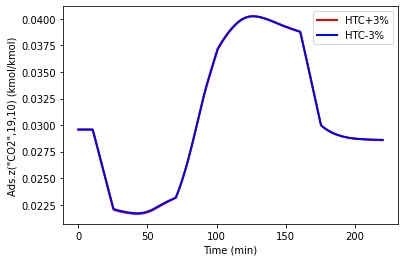

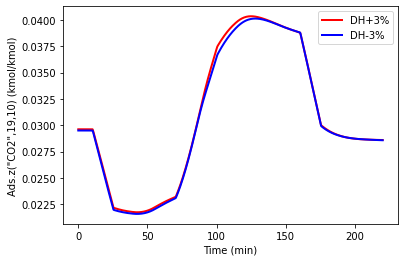

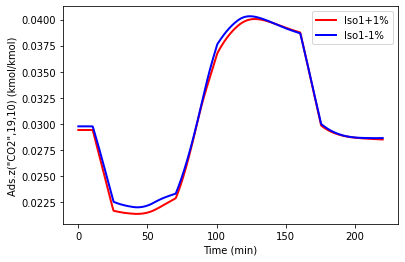

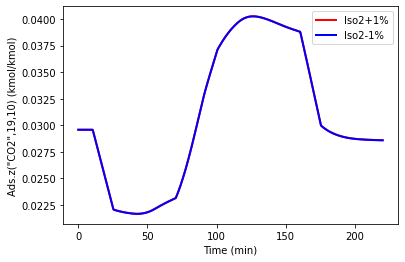

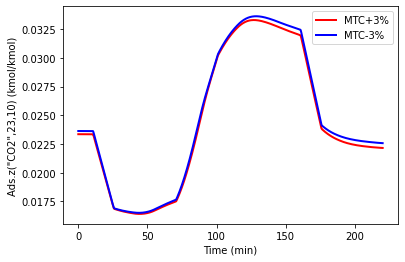

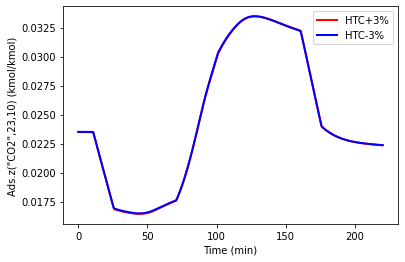

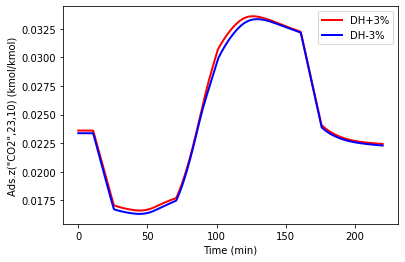

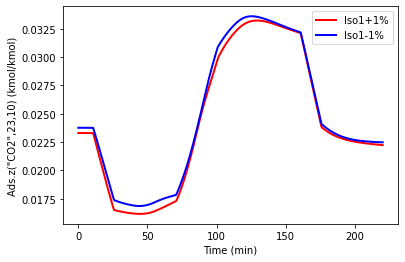

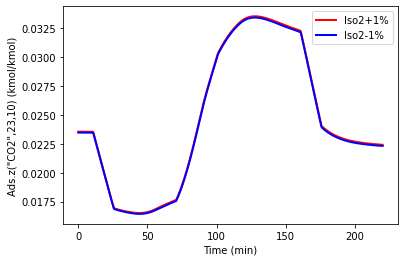

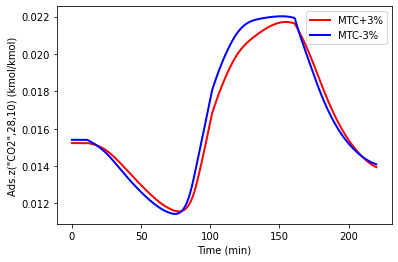

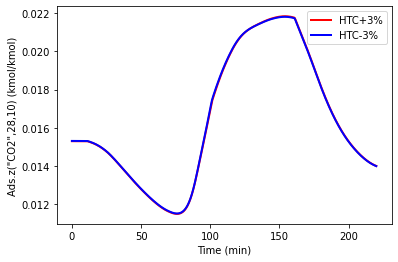

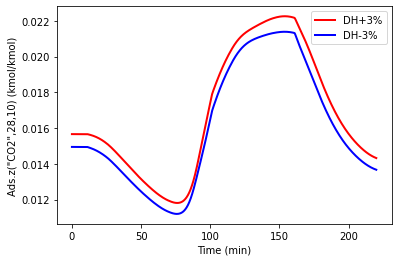

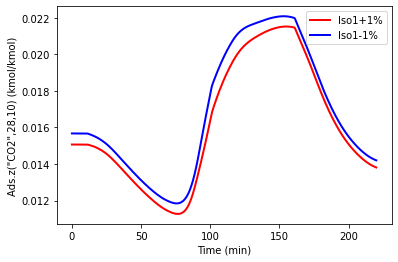

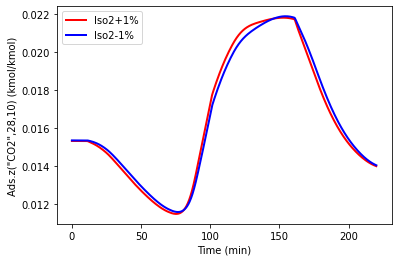

In [40]:
for me, mename in enumerate(col_names_unit):

    plot_data(0, me, mename, 'MTC+3%', 'MTC-3%')
    plot_data(2, me, mename, 'HTC+3%', 'HTC-3%')
    plot_data(4, me, mename, 'DH+3%', 'DH-3%')
    plot_data(6, me, mename, 'Iso1+1%', 'Iso1-1%')
    plot_data(8, me, mename, 'Iso2+1%', 'Iso2-1%')

In [35]:
def plot_data(scena, measure_number, measure_label, para_label1, para_label2):
    sense = []

    plt.plot(timeSet, output_record[scena][measure_number], linewidth=2, color='red', label=para_label1)
    plt.plot(timeSet, output_record[scena+1][measure_number], linewidth=2, color='blue', label=para_label2)
    plt.xlabel('Time (min)')
    plt.ylabel(measure_label)
    plt.legend()
    plt.show()



In [ ]:
for i in range(2201):
    sense.append((output_record[0][0][i] - output_record[1][0][i])/0.06)
    
#print(sense)

#plt.plot(timeSet, sense)

### DoE to get Q matrix

In [14]:
Q = np.zeros((35200,5))

for i in [0,2,4,6,8]:
    
    if i in [0,2,4]:
        
        for j in range(35200):

            Q[j][int(i/2)] = (output_doe[i][j]-output_doe[i+1][j])/0.06
    
    else:
        
        for l in range(35200):
            Q[j][int(i/2)] = (output_doe[i][j]-output_doe[i+1][j])/0.02
        

In [15]:
FIM = Q.T@Q

print(FIM)

[[ 1.05823569e+06  5.21449487e+04  9.55002901e+05  4.92321000e-05
   5.95030000e-06]
 [ 5.21449487e+04  5.42707757e+03  3.22049197e+04 -2.92275000e-06
  -3.53250000e-07]
 [ 9.55002901e+05  3.22049197e+04  2.82056683e+06 -2.12224125e-04
  -2.56498750e-05]
 [ 4.92321000e-05 -2.92275000e-06 -2.12224125e-04  3.79665225e-04
   4.58871750e-05]
 [ 5.95030000e-06 -3.53250000e-07 -2.56498750e-05  4.58871750e-05
   5.54602500e-06]]


In [16]:
print(Q)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 ...
 [-0.00249333  0.00015167  0.01090167  0.          0.        ]
 [-0.00251     0.00015     0.01089667  0.          0.        ]
 [-0.00252667  0.00015     0.01089167 -0.019485   -0.002355  ]]
